In [1]:
import numpy as np 
import mne

from class_microstates import Microstates

from class_MicrostateMetrics import MicrostateMetrics 
from scipy.signal import find_peaks 
import matplotlib.pyplot as plt 
import autoreject

from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs

In [2]:
"""ZAŁADOWANIE SYGNAŁU I USTAWIENIE UKŁADU ELEKTROD"""
d_path = "/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/Dane/raw/20241017_kp.bdf" #ścieżka do pliku
ch_eog = ["EXG1","EXG2"] #zdefiniowanie dedykowanych kanałów EOG
ch_ecg = ["EXG3","EXG4"] #zdefiniowanie dedykowanych kanałów ECG
ch_exclude = [f"EXG{i}" for i in range(5,9)] #wykluczenie kanałów niewykorzystanych w badaniu
raw = mne.io.read_raw_bdf(
    d_path, preload = True, eog = ch_eog, misc = ch_ecg, exclude = ch_exclude 
)
raw.set_montage("biosemi64")
raw.set_eeg_reference(projection=True)
raw.filter(0.1, 45)
raw.notch_filter(50)
epochs = mne.make_fixed_length_epochs(raw, duration=4, preload=True)
epochs.load_data()


ica_fname = "/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/Dane/processed/best_ica_19.05-ica.fif"
epochs_ar_fname = "/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/Dane/processed/epochs_ar_1.set"
reject_log_filename = "/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg.npz"
ica = mne.preprocessing.read_ica(ica_fname)
epochs_ar = mne.read_epochs_eeglab(epochs_ar_fname)
reject_log = autoreject.read_reject_log(reject_log_filename)
epochs_ica = epochs[~reject_log.bad_epochs]

Extracting EDF parameters from /Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/Dane/raw/20241017_kp.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2928639  =      0.000 ...  1430.000 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequenc

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    2.6s finished


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 13517 samples (6.600 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Not setting metadata
357 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 357 events and 8192 original time points ...


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    1.9s finished


0 bad epochs dropped
Reading /Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/Dane/processed/best_ica_19.05-ica.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
Now restoring ICA solution ...
Ready.


/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/pyprep_env/lib/python3.13/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/pyprep_env/lib/python3.13/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/pyprep_env/lib/python3.13/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid value encountered in matmul
  return (u @ vh[:rank]).conj().T


Extracting parameters from /Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/Dane/processed/epochs_ar_1.set...


/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_79195/158730034.py:21: RuntimeWarning: Estimated head radius (11.4 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  epochs_ar = mne.read_epochs_eeglab(epochs_ar_fname)


Not setting metadata
292 matching events found
No baseline correction applied
0 projection items activated
Ready.


In [3]:
ica_fname = "/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/Dane/processed/best_ica_19.05-ica.fif"
epochs_ar_fname = "/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/Dane/processed/epochs_ar_1.set"
reject_log_filename = "/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg.npz"
ica = mne.preprocessing.read_ica(ica_fname)
epochs_ar = mne.read_epochs_eeglab(epochs_ar_fname)
reject_log = autoreject.read_reject_log(reject_log_filename)
epochs_ica = epochs[~reject_log.bad_epochs]


ica.exclude=[0,1,54] 
epochs_ica_cleaned_1 = epochs_ar.copy()


ica.apply(epochs_ica_cleaned_1, exclude=ica.exclude)
# Lista typowych kanałów EEG (np. z dokumentacji Biosemi64)
biosemi64_names = mne.channels.make_standard_montage('biosemi64').ch_names


epochs_eeg_final_1 = epochs_ica_cleaned_1.copy().pick_channels(biosemi64_names)
epochs_eeg_final_1.set_eeg_reference("average")

Reading /Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/Dane/processed/best_ica_19.05-ica.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
Now restoring ICA solution ...
Ready.


/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/pyprep_env/lib/python3.13/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/pyprep_env/lib/python3.13/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/pyprep_env/lib/python3.13/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid value encountered in matmul
  return (u @ vh[:rank]).conj().T


Extracting parameters from /Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/Dane/processed/epochs_ar_1.set...


/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_79195/1765432759.py:5: RuntimeWarning: Estimated head radius (11.4 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  epochs_ar = mne.read_epochs_eeglab(epochs_ar_fname)


Not setting metadata
292 matching events found
No baseline correction applied
0 projection items activated
Ready.
Applying ICA to Epochs instance
    Applying projection operator with 1 vector (pre-whitener application)
    Transforming to ICA space (63 components)
    Zeroing out 3 ICA components
    Projecting back using 64 PCA components


/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/pyprep_env/lib/python3.13/site-packages/mne/preprocessing/ica.py:881: RuntimeWarning: divide by zero encountered in matmul
  data = proj @ data
/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/pyprep_env/lib/python3.13/site-packages/mne/preprocessing/ica.py:881: RuntimeWarning: overflow encountered in matmul
  data = proj @ data
/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/pyprep_env/lib/python3.13/site-packages/mne/preprocessing/ica.py:881: RuntimeWarning: invalid value encountered in matmul
  data = proj @ data
/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/pyprep_env/lib/python3.13/site-packages/mne/preprocessing/ica.py:2401: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/pyprep_env/lib/python3.13/site-packages/mne/preprocessing/ica.py:2401: RuntimeWarning: overflo

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<EpochsEEGLAB | 292 events (all good), 0 – 4 s (baseline off), ~1.14 GiB, data loaded,
 '1': 292>

In [4]:
"""Przygotowanie danych - piki GFP"""
all_peaks = []

for epoch in epochs_eeg_final_1.get_data():  # get_data() -> shape: (n_epochs, n_channels, n_times)
    gfp = np.std(epoch, axis=0)  # GFP dla tej epoki
    peak_idxs, _ = find_peaks(gfp)
    # Wyciągamy mapy topograficzne dla tych pików
    maps = epoch[:, peak_idxs]  # shape: (n_channels, n_peaks_in_epoch)
    all_peaks.append(maps)


peaks_all = np.hstack(all_peaks)  # shape: (n_channels, n_peaks_total)

In [5]:
"""FIT"""
micro = Microstates(peaks=peaks_all, n_microstates=4, max_iters=100)
micro.fit(peaks_all)

In [6]:
info = epochs_eeg_final_1.info
micro.centroids 


array([[ 0.01945259,  0.15522106,  0.31900784,  0.0063386 ,  0.13187501,
         0.18771683,  0.17641129,  0.17873841,  0.17088439,  0.09417839,
         0.04879755,  0.00725483,  0.0800108 ,  0.10128829,  0.11719439,
         0.08711   ,  0.078796  ,  0.06347631, -0.00540113,  0.05521863,
         0.04176281,  0.09431387,  0.12928539,  0.11255174,  0.11393195,
         0.07447895,  0.08021671,  0.09651589,  0.05862489,  0.04334211,
         0.03170161,  0.00586203, -0.11517782, -0.29719623, -0.33435668,
        -0.23870863, -0.01995149, -0.03421957, -0.10196647, -0.19792919,
        -0.23280452, -0.2438949 , -0.12650029, -0.17783867, -0.14151345,
        -0.1026192 , -0.01823901, -0.02077098, -0.05917932, -0.12032182,
        -0.16647888, -0.04735673, -0.02462737, -0.08325483, -0.04950329,
        -0.05436825,  0.0058075 , -0.01887422, -0.0623064 , -0.01006003,
         0.06335431,  0.02804535,  0.01149954,  0.03515344],
       [ 0.32975972,  0.10065336,  0.34618886,  0.06269454,  0.

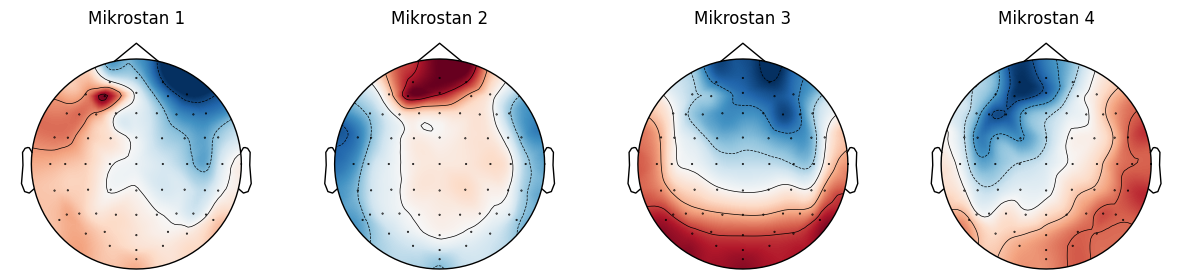

In [7]:
from visualise_microstates import visualise_base_microstates
fig, axes = visualise_base_microstates(
    micro.centroids,
    info=info,  
    figsize=(15, 4), 
    show=True
)



In [9]:
micro.centroids.shape

(4, 64)

In [10]:
"""Przygotowanie do metryk"""

from func_segment_epochs import segment_epochs
final_labels,final_data = segment_epochs(epochs_eeg_final_1,micro) 
centroids_trans = micro.centroids.T

In [11]:
"""Metryki"""

 

metrics = MicrostateMetrics(labels=final_labels,data=final_data,info=epochs_eeg_final_1.info,centroids=centroids_trans)

microstates_duration = metrics.calculate_duration()
coverage = metrics.coverage()
gev = metrics.GEV()
occurences_dict = metrics.microstates_per_second()
propability_transtiton_matrix= metrics.transtition_propability()


In [12]:
print(microstates_duration)
print(coverage)
print(gev)
print(occurences_dict)

{np.float64(0.0): np.float64(0.017507651417525773), np.float64(1.0): np.float64(0.014646947850344873), np.float64(2.0): np.float64(0.01801537073525663), np.float64(3.0): np.float64(0.01571398879496358)}
{np.int64(0): np.float64(26.89852779858733), np.int64(1): np.float64(18.908106137628426), np.int64(2): np.float64(27.22665447078339), np.int64(3): np.float64(26.96671159300086)}
34.702795978826416
{np.float64(0.0): 15.363869863013699, np.float64(1.0): 12.909246575342467, np.float64(2.0): 15.113013698630137, np.float64(3.0): 17.160958904109588}


In [13]:
print(propability_transtiton_matrix)

[[0.         0.24747841 0.31551964 0.43700195]
 [0.29588114 0.         0.33567686 0.368442  ]
 [0.33101065 0.29243145 0.         0.3765579 ]
 [0.38121134 0.27314907 0.34563959 0.        ]]


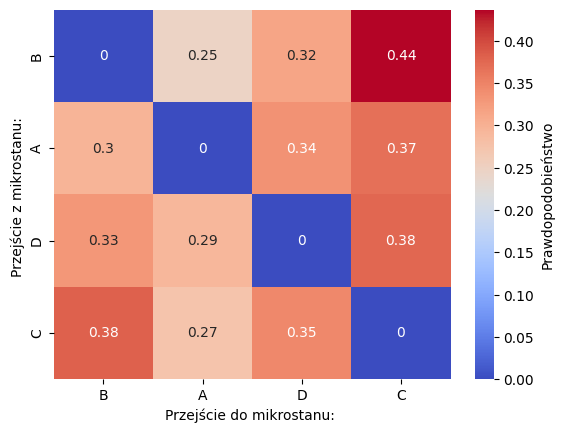

In [14]:
import seaborn as sns

custom_labels = ['B', 'A', 'D', 'C'] 
ax = sns.heatmap(propability_transtiton_matrix,annot=True,cmap="coolwarm",xticklabels=custom_labels ,yticklabels=custom_labels)
ax.set_ylabel("Przejście z mikrostanu: ")
ax.set_xlabel("Przejście do mikrostanu: ")
ax.collections[0].colorbar.set_label("Prawdopodobieństwo")

In [15]:
d_path_2 = "/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/Dane/processed/main_pyprep.fif"
raw_full_processed_by_prep = mne.io.read_raw_fif(d_path_2, preload=True)


Opening raw data file /Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/Dane/processed/main_pyprep.fif...
    Range : 0 ... 2928639 =      0.000 ...  1430.000 secs
Ready.
Reading 0 ... 2928639  =      0.000 ...  1430.000 secs...


/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_79195/1180220664.py:2: RuntimeWarning: This filename (/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/Dane/processed/main_pyprep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_full_processed_by_prep = mne.io.read_raw_fif(d_path_2, preload=True)


In [16]:
raw_full_processed_by_prep.set_eeg_reference("average")
data = raw_full_processed_by_prep.get_data(picks='eeg')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


In [58]:
gfp = np.std(data,axis=0)
gfp_peaks,_ = find_peaks(gfp,distance=5)
peaks_all_2 = data[:,gfp_peaks]



In [59]:
micro_2 = Microstates(peaks=peaks_all_2, n_microstates=4, max_iters=80)
micro_2.fit(peaks_all_2)

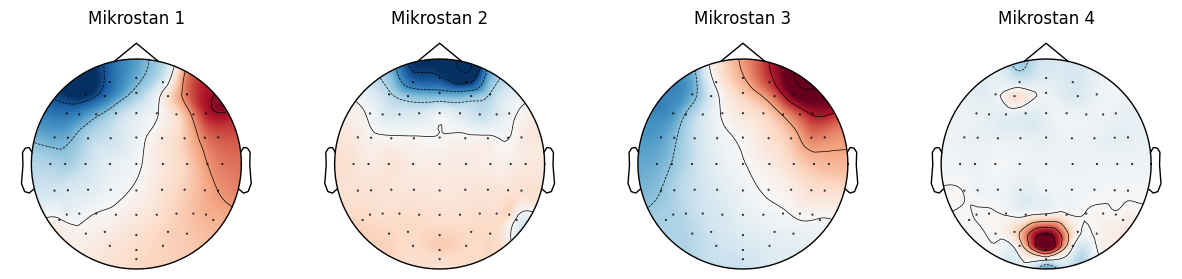

In [61]:
fig_2, axes_2 = visualise_base_microstates(
    micro_2.centroids,
    info=raw_full_processed_by_prep.info,  
    figsize=(15, 4), 
    show=True
)


In [50]:
micro_3 = Microstates(peaks=peaks_all_2, n_microstates=4, max_iters=100)
micro_3.fit(peaks_all_2)

KeyboardInterrupt: 

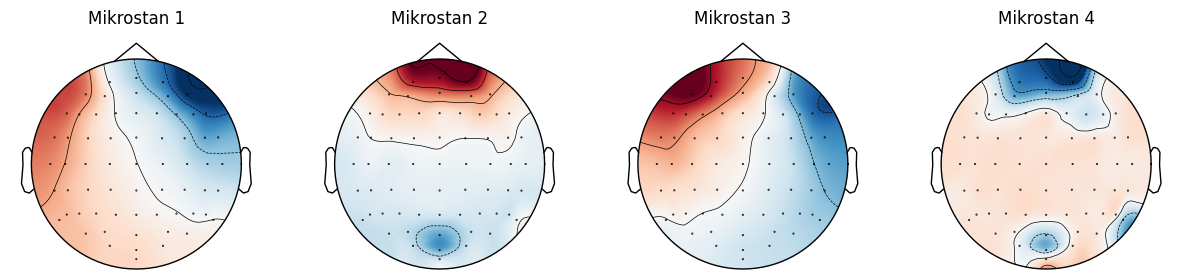

In [29]:
fig_3, axes_3 = visualise_base_microstates(
    micro_3.centroids,
    info=raw_full_processed_by_prep.info,  
    figsize=(15, 4), 
    show=True
)

In [62]:
final_labels_2 = micro_2.predict(data)

In [63]:
centroids_trans_2 = micro_2.centroids.T


In [64]:
metrics = MicrostateMetrics(
    labels=final_labels_2,
    data=data,
    info=raw_full_processed_by_prep.info,
    centroids=centroids_trans_2
)

microstates_duration = metrics.calculate_duration()
coverage = metrics.coverage()
gev = metrics.GEV()
occurences_dict = metrics.microstates_per_second()
propability_transtiton_matrix= metrics.transtition_propability()

In [65]:
print(microstates_duration)
print(coverage)
print(gev)
print(occurences_dict)

{np.float64(0.0): np.float64(0.04284427822142266), np.float64(1.0): np.float64(0.05333102236778066), np.float64(2.0): np.float64(0.04343148626384092), np.float64(3.0): np.float64(0.027734119948853744)}
{np.int64(0): np.float64(28.936366368006993), np.int64(1): np.float64(34.482421875), np.int64(2): np.float64(29.897870684003497), np.int64(3): np.float64(6.68334107298951)}
78.59050966817377
{np.float64(0.0): 6.753846153846154, np.float64(1.0): 6.465734265734266, np.float64(2.0): 6.883916083916084, np.float64(3.0): 2.4097902097902097}


In [66]:
maps_autoreject = micro.centroids
maps_pyprep = micro_2.centroids 

np.save("maps_autoreject",maps_autoreject)
np.save("maps_pyprep",maps_pyprep)

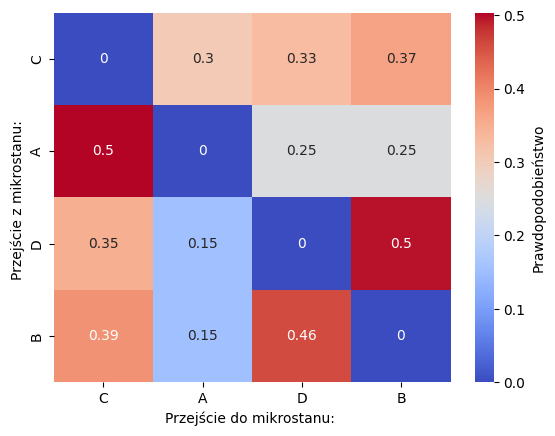

In [34]:
custom_labels = ['C', 'A', 'D', 'B'] 
ax = sns.heatmap(propability_transtiton_matrix,annot=True,cmap="coolwarm",xticklabels=custom_labels ,yticklabels=custom_labels)
ax.set_ylabel("Przejście z mikrostanu: ")
ax.set_xlabel("Przejście do mikrostanu: ")
ax.collections[0].colorbar.set_label("Prawdopodobieństwo")

In [ ]:
micro_4 = Microstates(peaks=peaks_all)

In [ ]:
loaded_maps = np.load("/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/canonical_maps_Damborska.npy")



In [43]:
my_ch_names = raw_full_processed_by_prep.info["ch_names"]
print(my_ch_names)
print(len(my_ch_names))

['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'EXG4', 'EXG2', 'Status', 'EXG3', 'EXG1']
69


In [62]:
my_ch_names.type

AttributeError: 'list' object has no attribute 'type'

In [46]:
micro_2.centroids.shape

(4, 64)

In [45]:
maps_file = '/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/Dane/processed/mean_models_milz_et_al_2016.asc'
canonical_maps = np.loadtxt(maps_file)

print(f"Kształt macierzy map: {canonical_maps.shape}")

Kształt macierzy map: (4, 61)


In [76]:
canonical_maps

array([[ 0.65972794,  0.22870416,  0.46787354,  0.52327185,  0.19941174,
         0.00979101, -0.10202607, -0.47123834, -0.37303686, -0.13765129,
         0.21488975, -0.27242702, -0.72205816, -0.8721238 , -0.90823815,
        -1.24225237, -1.4027074 , -1.26915003, -0.8066598 , -1.28859557,
        -1.72800101, -1.91289633, -1.79414766, -2.20055168, -2.10179502,
        -1.90303822, -1.17200164, -1.30946755, -0.80626243, -0.27387372,
         0.8537434 ,  1.0229845 ,  1.2183938 ,  1.09879724,  0.8279351 ,
         0.735121  ,  0.94250448,  1.13964499,  1.22332903,  1.26063925,
         1.21338599,  1.20165012,  1.10076762,  0.82960696,  0.5633406 ,
         0.17980434,  0.59423515,  0.94042342,  1.11087902,  1.1083509 ,
         0.99060552,  0.87522212,  0.59923967,  0.20510104, -0.21397318,
         0.25698924,  0.56205314,  0.74403381,  0.33467586, -0.29515577,
        -0.45779823],
       [ 0.92678992,  1.11193653,  1.03347677,  0.97106201,  1.12378705,
         1.15220987,  1.12787

In [49]:
ch_list_milz = "/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/Dane/processed/mean_models_milz_et_al_2016_chlist.asc"
with open(ch_list_milz, 'r') as f:
    # Wczytaj każdą linię i usuń ewentualne białe znaki
    ref_ch_names = [line.strip() for line in f]

print(f"Liczba wczytanych kanałów: {len(ref_ch_names)}")
print(f"Pierwsze 5 kanałów: {ref_ch_names[:5]}")

Liczba wczytanych kanałów: 1
Pierwsze 5 kanałów: ['FP1 AF7 AF3 F1 F3 F5 F7 FT7 FC5 FC3 FC1 C1 C3 C5 T7 TP7 CP5 CP3 CP1 P1 P3 P5 P7 PO7 PO3 O1 Oz POz Pz CPz FPz FP2 AF8 AF4 AFz Fz F2 F4 F6 F8 FT8 FC6 FC4 FC2 FCz Cz C2 C4 C6 T8 TP8 CP6 CP4 CP2 P2 P4 P6 P8 PO8 PO4 O2']


In [64]:
raw_ch_string = ref_ch_names[0]
milz_ch_names = [name.strip() for name in raw_ch_string.split()]

len(milz_ch_names)

61

In [65]:
my_set = set(my_ch_names)
ref_set = set(milz_ch_names)

# Użycie operacji różnicy zbiorów:
# Zwraca elementy, które są w my_set, ale NIE ma ich w ref_set
missing_in_ref = my_set - ref_set 

# Konwersja wyniku z powrotem na listę dla łatwej czytelności
channels_missing_in_reference = sorted(list(missing_in_ref))

print(f"Liczba kanałów w Twoim zbiorze (MNE): {len(my_ch_names)}")
print(f"Liczba kanałów w zbiorze referencyjnym (.asc): {len(milz_ch_names)}")
print("-" * 50)
print(f"✅ Kanały obecne w Twoim zbiorze, ale BRAKUJĄCE w zbiorze referencyjnym ({len(channels_missing_in_reference)}):")
print(channels_missing_in_reference)

Liczba kanałów w Twoim zbiorze (MNE): 69
Liczba kanałów w zbiorze referencyjnym (.asc): 61
--------------------------------------------------
✅ Kanały obecne w Twoim zbiorze, ale BRAKUJĄCE w zbiorze referencyjnym (11):
['EXG1', 'EXG2', 'EXG3', 'EXG4', 'Fp1', 'Fp2', 'Fpz', 'Iz', 'P10', 'P9', 'Status']


In [68]:

channels_to_remove = ["Iz","P10","P9"]
my_ch_name_to_index = {name: i for i, name in enumerate(my_ch_names)}

# 2. Znajdź indeksy, które należy usunąć
indices_to_remove = [my_ch_name_to_index[name] for name in channels_to_remove if name in my_ch_names]

# Zawsze dobrze jest sprawdzić, czy wszystkie kanały zostały znalezione
if len(indices_to_remove) != len(channels_to_remove):
    print("OSTRZEŻENIE: Nie wszystkie kanały do usunięcia zostały znalezione w Twoim zbiorze!")

In [74]:
micro_2.centroids.shape

(4, 64)

In [2]:
import numpy as np
from scipy.stats import pearsonr

# DANE WEJŚCIOWE
# my_maps_centroids (4x64)
# canonical_maps (4x61)
# my_ch_names (69 elementów)
# ref_ch_names (61 elementów)
channels_to_remove_from_ref = ["Iz", "P10", "P9"]


# ==============================================================================
# 1. REDUKCJA LISTY KANAŁÓW (69 -> 64)
# ==============================================================================

# Znajdujemy, które z 69 nazw faktycznie zostały sklastryzowane (64).
# Zakładamy, że lista 64 nazw jest dostępna jako ref_ch_names + usunięte + 3 inne.
# Najbezpieczniejsza metoda: Porównać listę 69 nazw z osiami macierzy (64).

# W tym przypadku musimy zidentyfikować kanały, które nie są elektrodami (np. EOG/ECG)
# i usunąć je Z LISTY my_ch_names. To pozwoli uzyskać 64 nazwy.
# Musisz ręcznie zidentyfikować te 5 kanałów, np.:
NON_EEG_CHANNELS = ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'Status'] # PRZYKŁAD!

my_ch_names_64 = [name for name in my_ch_names if name not in NON_EEG_CHANNELS]

if len(my_ch_names_64) != 64:
    print("BŁĄD: Lista my_ch_names_64 nie ma 64 elementów. Sprawdź listę NON_EEG_CHANNELS.")
    exit()

# Macierz micro_2.centroids (4x64) jest teraz poprawnie zmapowana na my_ch_names_64.
# my_ch_names = my_ch_names_64 # Przypisujemy, aby użyć w dalszych krokach.


# ==============================================================================
# 2. PRZYGOTOWANIE I REDUKCJA MACIERZY (64 -> 61)
# ==============================================================================

# A. Transpozycja obu macierzy (Mikrostan x Kanał -> Kanał x Mikrostany)
my_maps_T = micro_2.centroids.T          # Kształt: (64, 4)
canonical_maps_T = canonical_maps.T      # Kształt: (61, 4)

# B. Znajdź indeksy do usunięcia (z 64)
# Używamy nowej, 64-elementowej listy
my_ch_name_to_index = {name: i for i, name in enumerate(my_ch_names_64)} 

indices_to_remove = []
for name in channels_to_remove_from_ref:
    if name in my_ch_name_to_index:
        indices_to_remove.append(my_ch_name_to_index[name])
    # Nie musimy sprawdzać, czy my_ch_names_64 jest w macierzy, bo już wiemy, że ma 64 wiersze.

# C. Utwórz maskę i ograniczanie macierzy
all_indices = np.arange(len(my_ch_names_64)) # Teraz poprawnie idzie do 63
indices_to_keep = [i for i in all_indices if i not in indices_to_remove]

# D. Ograniczenie Twojej macierzy map (64 x 4 -> 61 x 4)
my_maps_reduced = my_maps_T[indices_to_keep, :]
my_ch_names_reduced = [my_ch_names_64[i] for i in indices_to_keep]

print(f"Twoja macierz map została zredukowana do kształtu: {my_maps_reduced.shape}")


# ======================================================|========================
# 3. REMAPOWANIE KOLEJNOŚCI I KORELACJA (jak wcześniej)
# ==============================================================================

# ... Tutaj umieść kod z sekcji 2 i 3 z mojej poprzedniej odpowiedzi, 
# używając my_maps_reduced, my_ch_names_reduced, canonical_maps_T, ref_ch_names.

NameError: name 'my_ch_names' is not defined

micro_fcm = Microstates(
    peaks=peaks_all, 
    n_microstates=4, 
    max_iters=100,
    algorithm="fcm",  # Wybór algorytmu FCM
    m=2.0  # Parametr rozmycia (fuzziness)
)

# Trenowanie modelu
micro_fcm.fit(peaks_all)

# Wizualizacja centroidów FCM
from visualise_microstates import visualise_base_microstates
fig_fcm, axes_fcm = visualise_base_microstates(
    micro_fcm.centroids,
    info=epochs_eeg_final.info,  
    figsize=(15, 4), 
    show=True


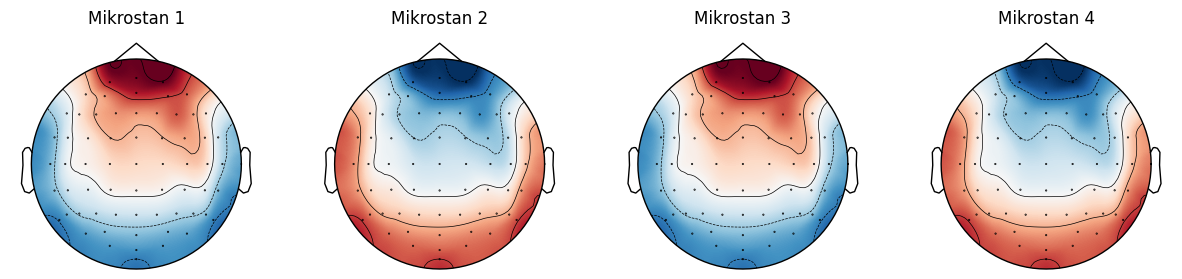

In [75]:
micro_fcm = Microstates(
    peaks=peaks_all, 
    n_microstates=4, 
    max_iters=100,
    algorithm="fcm",  # Wybór algorytmu FCM
    m=2.0  # Parametr rozmycia (fuzziness)
)

# Trenowanie modelu
micro_fcm.fit(peaks_all)

# Wizualizacja centroidów FCM
from visualise_microstates import visualise_base_microstates
fig_fcm, axes_fcm = visualise_base_microstates(
    micro_fcm.centroids,
    info=epochs_eeg_final_1.info,  
    figsize=(15, 4), 
    show=True
)

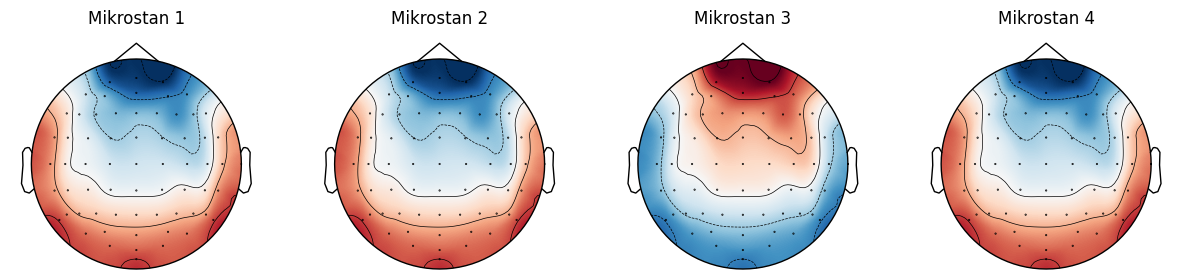

In [77]:
# Inicjalizacja modelu FK-means
micro_fkmeans = Microstates(
    peaks=peaks_all, 
    n_microstates=4, 
    max_iters=100,
    algorithm="fkmeans",  # Wybór algorytmu FK-means
    m=2.0  # Parametr rozmycia
)

# Trenowanie modelu
micro_fkmeans.fit(peaks_all)

# Wizualizacja centroidów FK-means
fig_fkmeans, axes_fkmeans = visualise_base_microstates(
    micro_fkmeans.centroids,
    info=epochs_eeg_final_1.info,  
    figsize=(15, 4), 
    show=True
)

In [78]:
final_labels_fcm, final_data_fcm, final_U_fcm = segment_epochs(epochs_eeg_final_1, micro_fcm)

# Obliczenie metryk dla FCM
centroids_trans_fcm = micro_fcm.centroids.T
metrics_fcm = MicrostateMetrics(
    labels=final_labels_fcm,
    data=final_data_fcm,
    info=epochs_eeg_final_1.info,
    centroids=centroids_trans_fcm
)

microstates_duration_fcm = metrics_fcm.calculate_duration()
coverage_fcm = metrics_fcm.coverage()
gev_fcm = metrics_fcm.GEV()
occurences_dict_fcm = metrics_fcm.microstates_per_second()
transition_matrix_fcm = metrics_fcm.transtition_propability()

In [79]:
print(microstates_duration_fcm)
print(coverage_fcm)
print(gev_fcm)
print(occurences_dict_fcm)
print(transition_matrix_fcm)

{np.int64(0): np.float64(0.0005219503721756333), np.int64(1): np.float64(0.0265688016418913), np.int64(2): np.float64(0.008925297319594886)}
{np.int64(0): np.float64(1.7958131555008563), np.int64(1): np.float64(52.06620725866866), np.int64(2): np.float64(46.13797958583048)}
22.090000885964077
{np.int64(0): 34.40582191780822, np.int64(1): 19.596746575342465, np.int64(2): 51.69349315068493}
[[0.         0.03239934 0.96760066]
 [0.06094631 0.         0.93905369]
 [0.64247975 0.35752025 0.        ]]


In [82]:
import importlib
import func_segment_epochs
importlib.reload(func_segment_epochs)
from func_segment_epochs import segment_epochs

In [83]:
# Segmentacja epok z FK-means
final_labels_fkmeans, final_data_fkmeans, final_U_fkmeans = segment_epochs(epochs_eeg_final_1, micro_fkmeans)

# Obliczenie metryk dla FK-means
centroids_trans_fkmeans = micro_fkmeans.centroids.T
metrics_fkmeans = MicrostateMetrics(
    labels=final_labels_fkmeans,
    data=final_data_fkmeans,
    info=epochs_eeg_final_1.info,
    centroids=centroids_trans_fkmeans
)

# Obliczenie różnych metryk
microstates_duration_fkmeans = metrics_fkmeans.calculate_duration()
coverage_fkmeans = metrics_fkmeans.coverage()
gev_fkmeans = metrics_fkmeans.GEV()
occurences_dict_fkmeans = metrics_fkmeans.microstates_per_second()
transition_matrix_fkmeans = metrics_fkmeans.transtition_propability()

In [84]:
print(microstates_duration_fkmeans)
print(coverage_fkmeans)
print(gev_fkmeans)
print(occurences_dict_fkmeans)


{np.int64(0): np.float64(0.0025714034469794785), np.int64(1): np.float64(0.0005145417149703605), np.int64(2): np.float64(0.0005771188454047283), np.int64(3): np.float64(0.02363075886369465)}
{np.int64(0): np.float64(43.48027477525685), np.int64(1): np.float64(0.9215054446703766), np.int64(2): np.float64(8.263867521939213), np.int64(3): np.float64(47.33435225813356)}
22.09000089221851
{np.int64(0): 169.0916095890411, np.int64(1): 17.909246575342465, np.int64(2): 143.1917808219178, np.int64(3): 20.03082191780822}


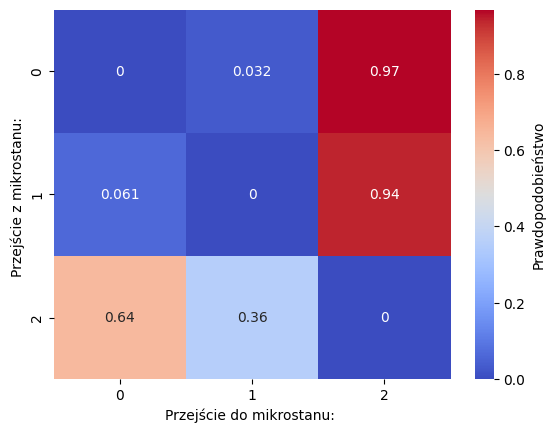

In [85]:

ax = sns.heatmap(transition_matrix_fcm,annot=True,cmap="coolwarm")
ax.set_ylabel("Przejście z mikrostanu: ")
ax.set_xlabel("Przejście do mikrostanu: ")
ax.collections[0].colorbar.set_label("Prawdopodobieństwo")

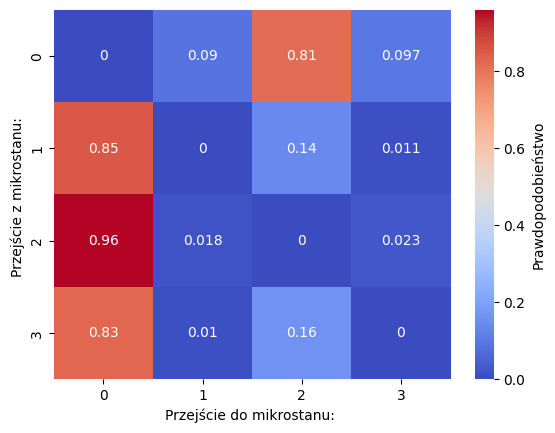

In [86]:
ax = sns.heatmap(transition_matrix_fkmeans,annot=True,cmap="coolwarm")
ax.set_ylabel("Przejście z mikrostanu: ")
ax.set_xlabel("Przejście do mikrostanu: ")
ax.collections[0].colorbar.set_label("Prawdopodobieństwo")

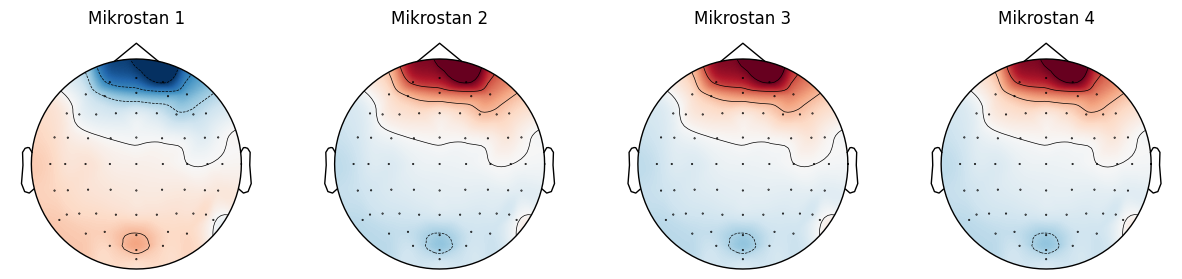

In [87]:
micro_fcm_prep = Microstates(
    peaks=peaks_all, 
    n_microstates=4, 
    max_iters=100,
    algorithm="fcm",  # Wybór algorytmu FCM
    m=2.0  # Parametr rozmycia (fuzziness)
)

# Trenowanie modelu
micro_fcm_prep.fit(peaks_all_2)

# Wizualizacja centroidów FCM
from visualise_microstates import visualise_base_microstates
fig_fcm_prep, axes_fcm_prep = visualise_base_microstates(
    micro_fcm_prep.centroids,
    info=raw_full_processed_by_prep.info,  
    figsize=(15, 4), 
    show=True
)

In [94]:
micro_fkmeans_prep = Microstates(
    peaks=peaks_all, 
    n_microstates=4, 
    max_iters=100,
    algorithm="fcm",  # Wybór algorytmu FCM
    m=2.0  # Parametr rozmycia (fuzziness)
)

# Trenowanie modelu
micro_fkmeans_prep.fit(peaks_all_2)

# Wizualizacja centroidów FCM
from visualise_microstates import visualise_base_microstates
fig_fkmeans_prep, axes_fkmeans_prep = visualise_base_microstates(
    micro_fkmeans_prep.centroids,
    info=raw_full_processed_by_prep.info,  
    figsize=(15, 4), 
    show=True
)

KeyboardInterrupt: 

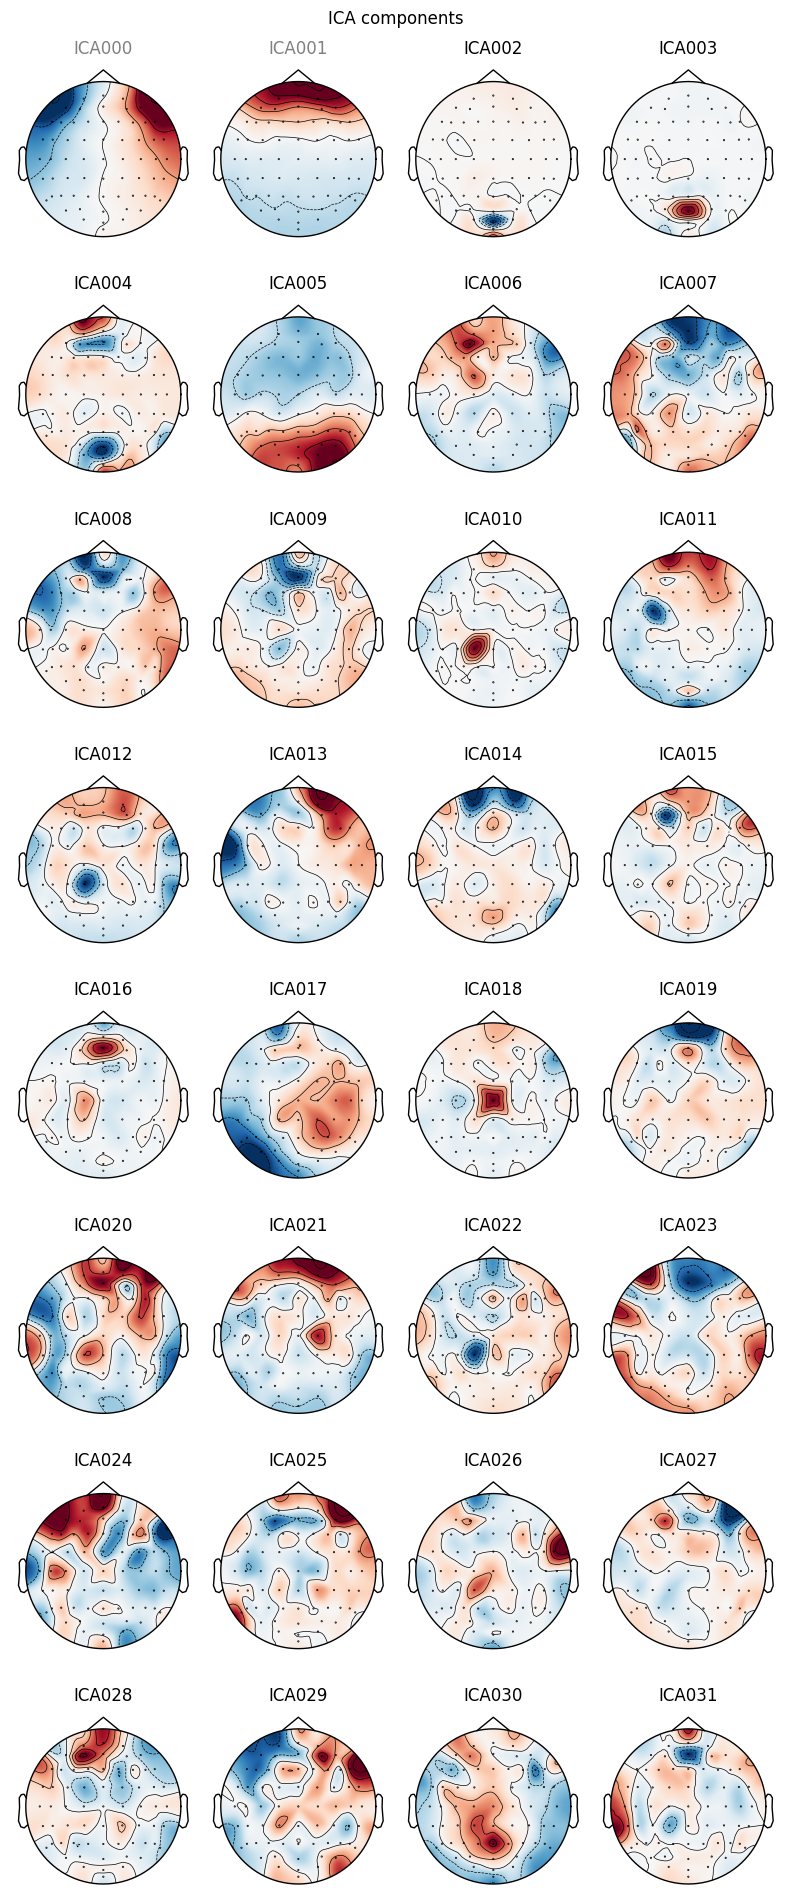

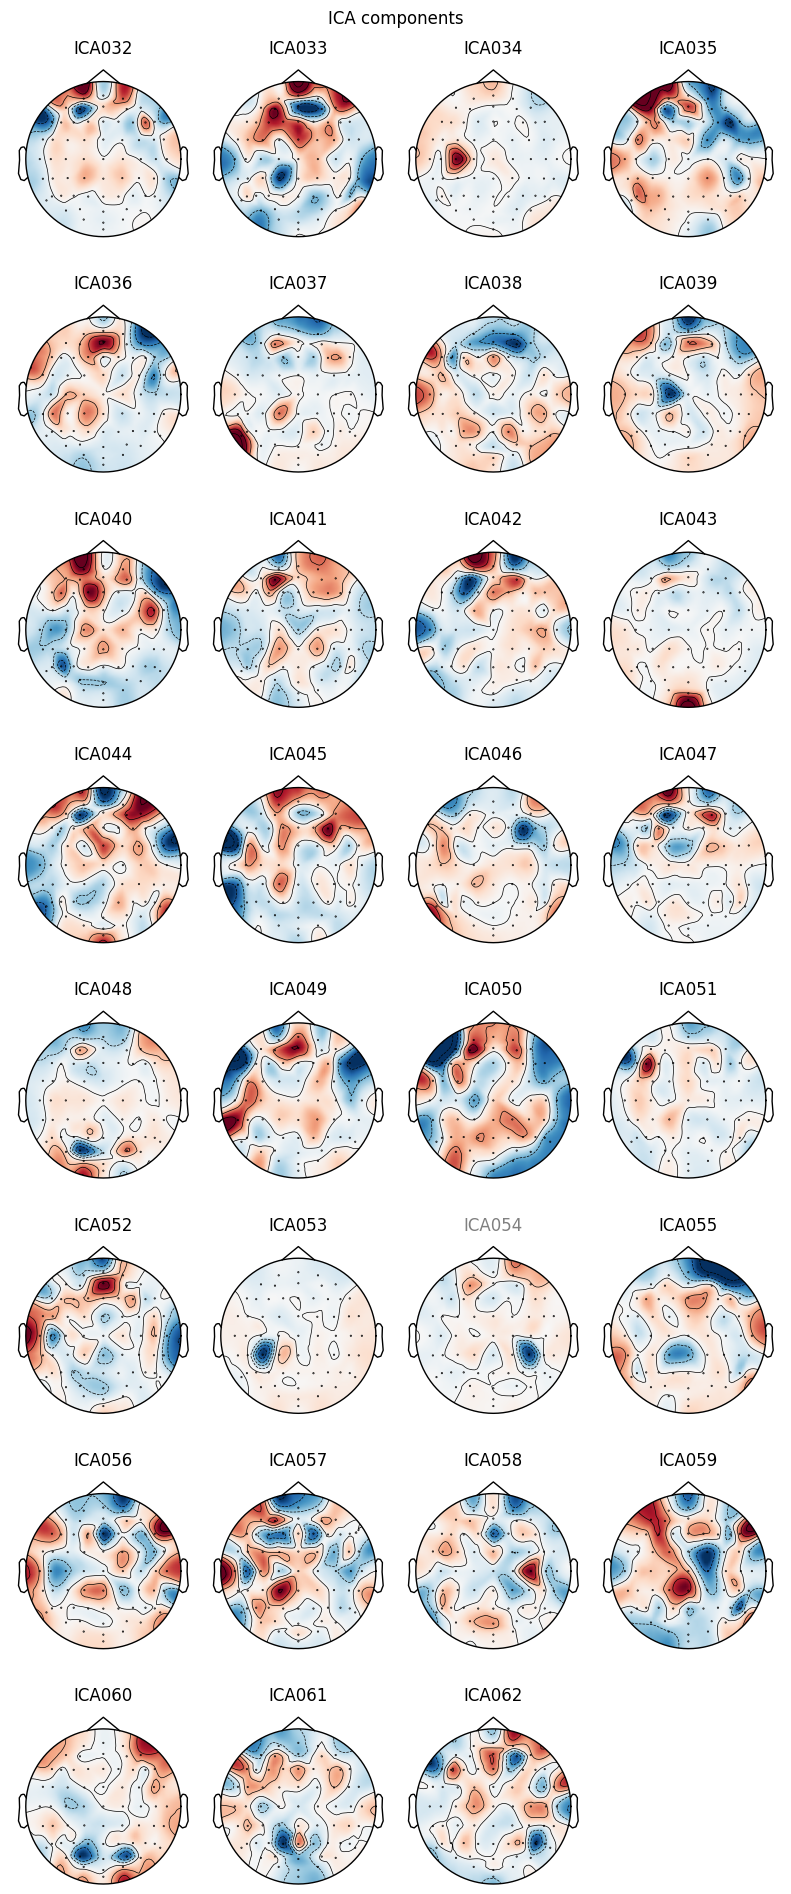

[<MNEFigure size 780x1909 with 32 Axes>,
 <MNEFigure size 780x1909 with 31 Axes>]

In [93]:
ica.plot_components(nrows = 8, ncols = 4)

    Applying projection operator with 1 vector (pre-whitener application)
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
292 matching events found
No baseline correction applied
0 projection items activated


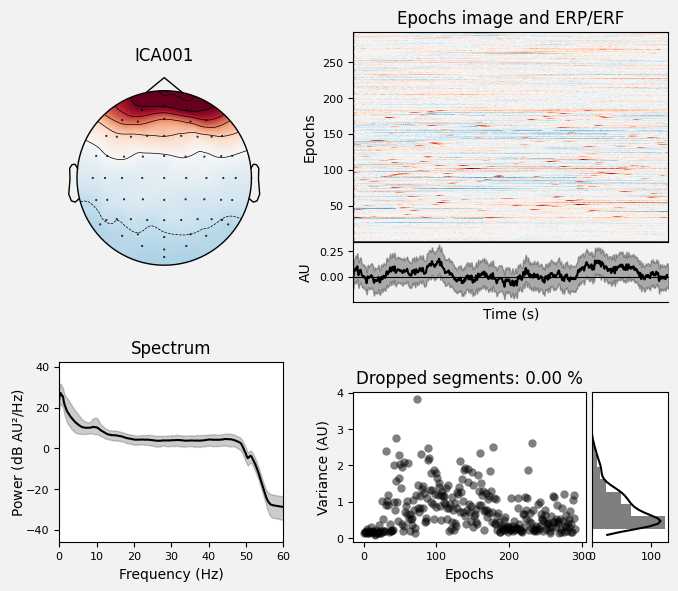

[<Figure size 700x600 with 6 Axes>]

In [103]:
ica.plot_properties(epochs_ar, picks=[1], psd_args={'fmax': 60, 'fmin': 0})


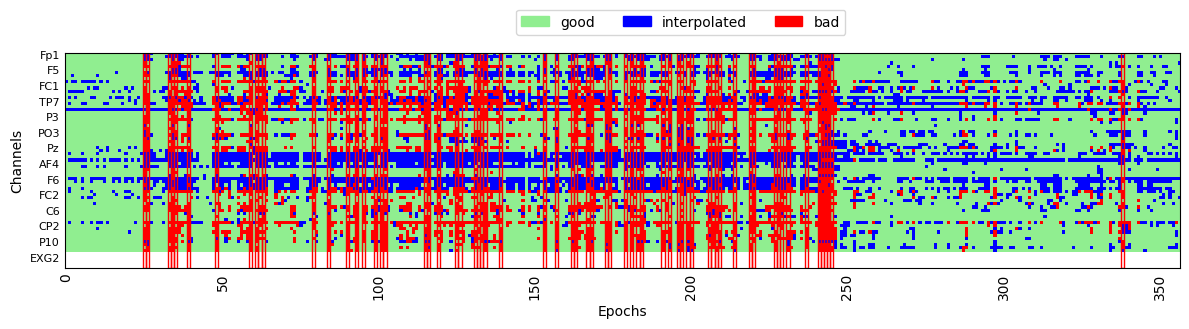

In [119]:
fig = reject_log.plot('horizontal',show_names="auto")
